In [64]:
#import required python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot
import matplotlib.pyplot as plt
#subplot = matplotlib.pyplot.subplot()

%matplotlib inline

import cv2

In [65]:
# Histogram plot of image for selected channel
def histPlot(img):
    color = ('r','g','b')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([img],[channel],None,[256],[0,256])
        histr = histr[1:]
        if (col=='r'):
            H = histr
    return H

In [66]:
# img1 = cv2.imread('AAT137 B7.jpg',1)
# img = cv2.imread('AAT137 B7.jpg',1)
# # img = img[330:550,260:490]

# # th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
# # th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
# #ret, img = cv2.threshold(img,180,255,cv2.THRESH_TRUNC)
# # img = cv2.convertScaleAbs(img, alpha=1, beta=0.8)
# # ret, img = cv2.threshold(img,190,255,cv2.THRESH_TRUNC)
# ret, img = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
# # img = cv2.Canny(img,160,180)
# # for i in range(0,2):
# #      img = cv2.medianBlur(img,3)

# # imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# im2, contours, hierarchy = cv2.findContours(imggray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# # cv2.drawContours(img, contours, -1, (0,0,255), 3)

# img1 = img1[330:550,260:490]
# plt.figure(figsize=(10,10))
# plt.imshow(img)
# # histg = cv2.calcHist([img],[0],None,[256],[0,256]) 
# # plt.plot(histg)

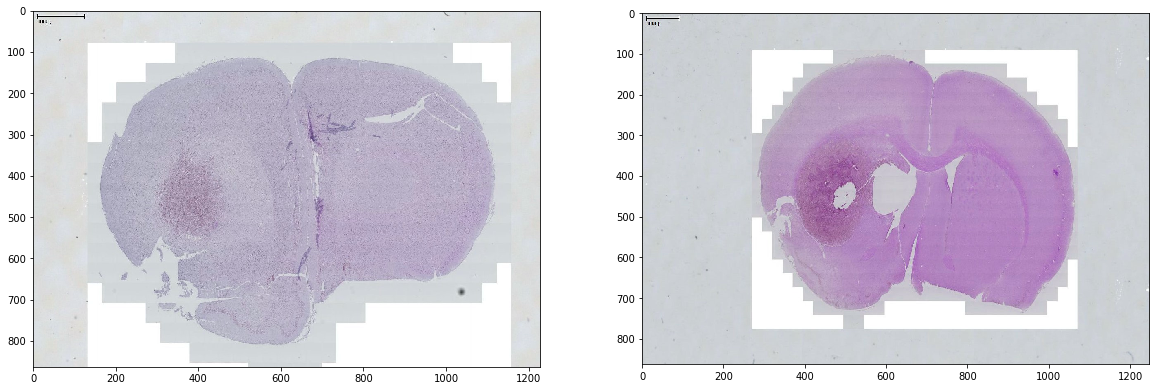

In [67]:
f,pt = plt.subplots(1,2,figsize=(20,10), sharey=False)
pt[0].imshow(cv2.imread('AAT137 B7.jpg'))
pt[1].imshow(cv2.imread('AAT140 C14.jpg'))

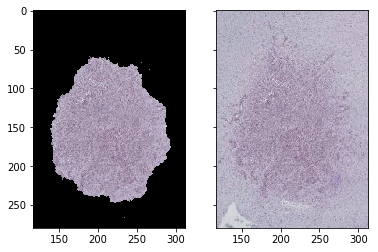

In [68]:
def crop(img):
    return img[300:580,170:600]

img = cv2.imread('AAT137 B7.jpg')
img1 = crop(img)
img = crop(img)

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,20,290,270)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

f,pt = plt.subplots(1, 2, sharey=True)
pt[0].imshow(img)
pt[1].imshow(img1)
B7 = img
B7_o = img1.copy()

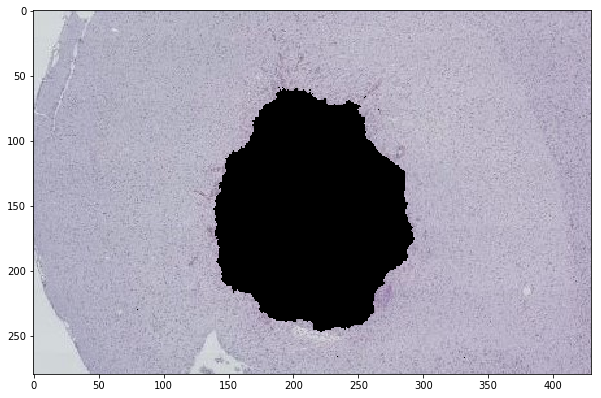

In [69]:
B7_ = img1-B7
plt.figure(figsize=(10,10))
plt.imshow(B7_)

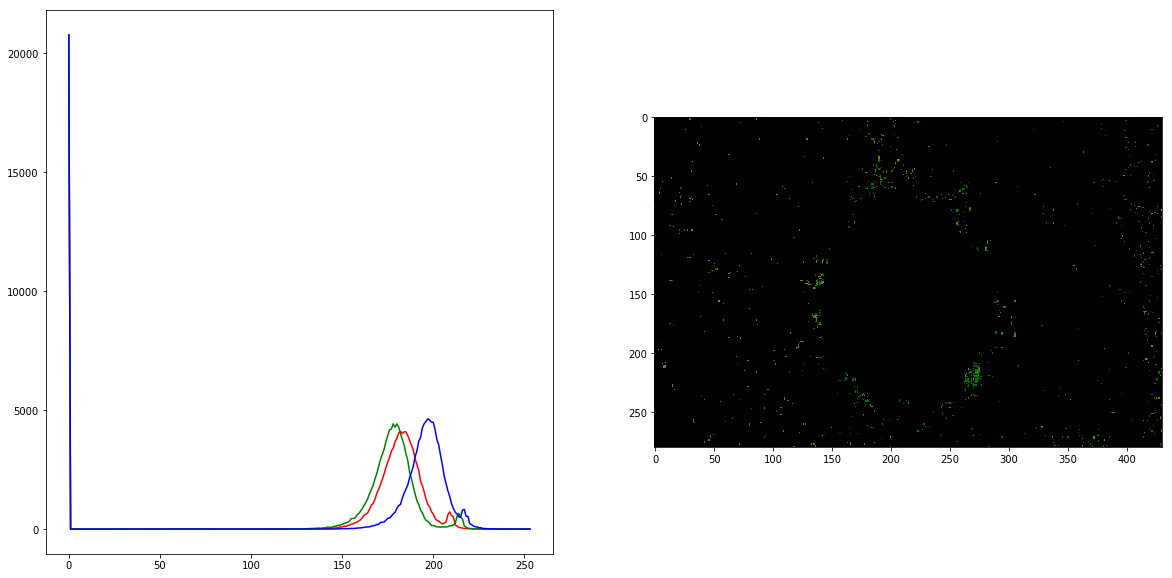

In [70]:
img = B7_.copy()
f,pt = plt.subplots(1, 2, figsize=(20,10), sharey=False)
color = ('r','g','b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    histr = histr[0:254]
    pt[0].plot(histr,color=col)

ret,img = cv2.threshold(img,147,255,cv2.THRESH_TOZERO)
pt[1].imshow(img-B7_)
B7_1 = img-B7_

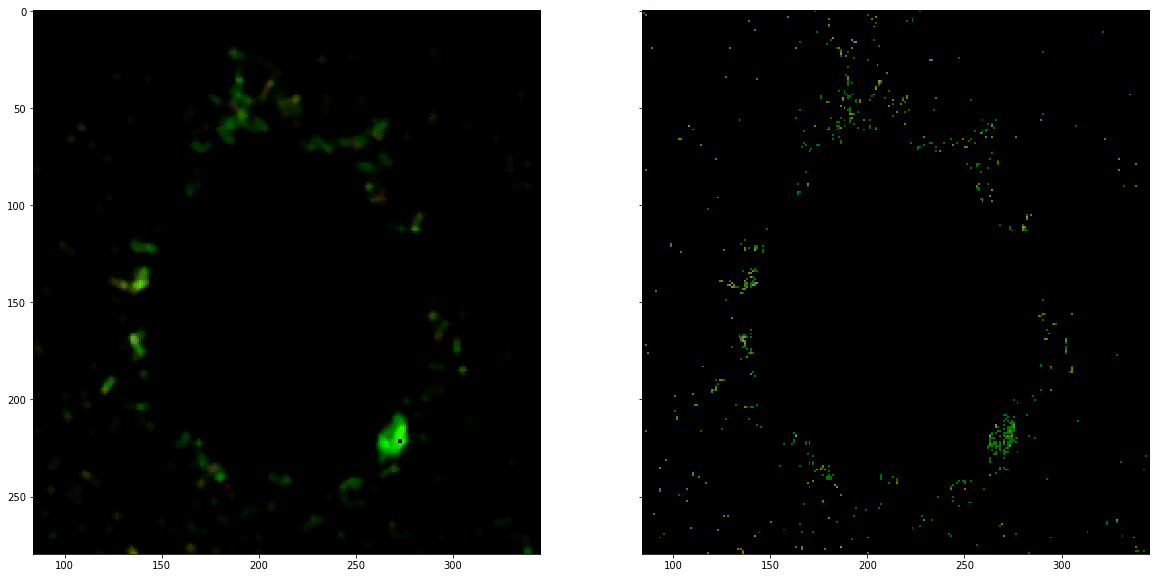

In [137]:
img = B7_1.copy()
img1 = img.copy()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,20,290,270)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

img = img*2
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.medianBlur(img,5)
img = img*2
f,pt = plt.subplots(1, 2,figsize=(20,10), sharey=True)
pt[0].imshow(img)
pt[1].imshow(img1)
B7_2 = img

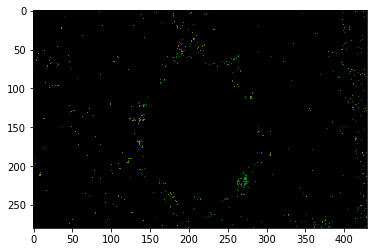

In [72]:
plt.imshow(img1)

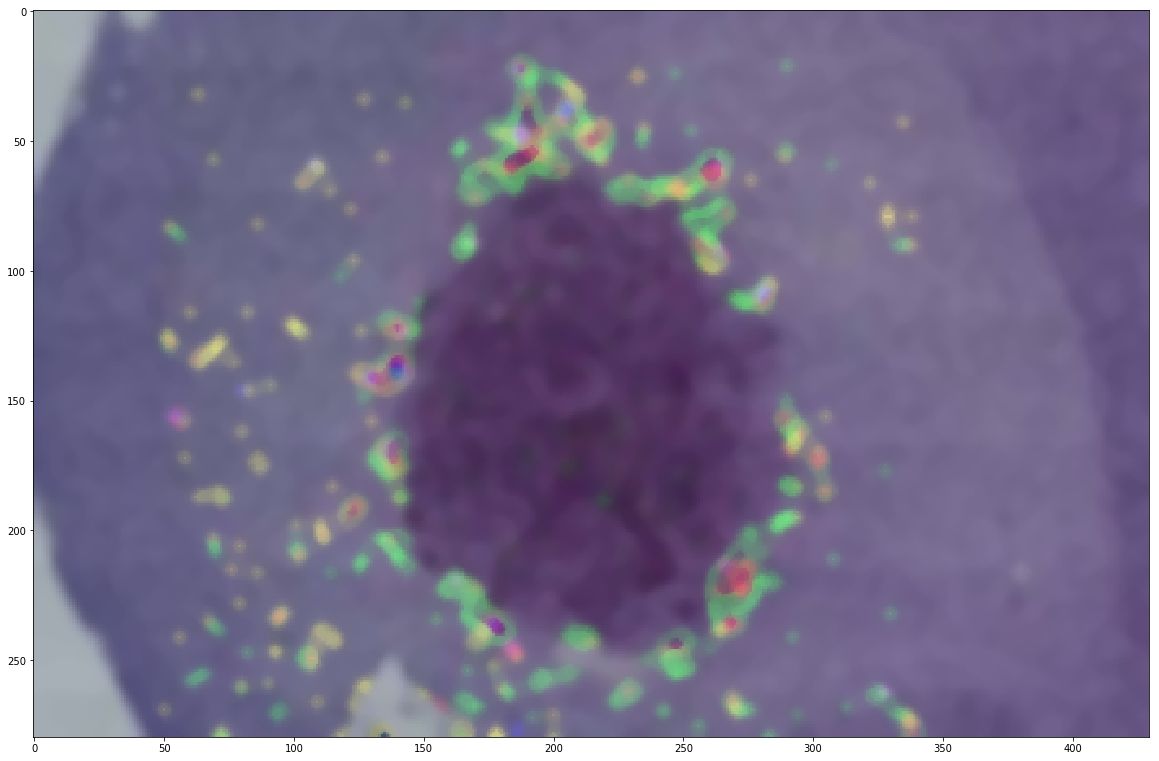

In [138]:
img = B7_o.copy()
img = img*2
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
img = img*1
for i in range(10):
    img = img + B7_2*2
    img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.medianBlur(img,5)
img = cv2.medianBlur(img,5)

plt.figure(figsize=(20,20))
plt.imshow(img)

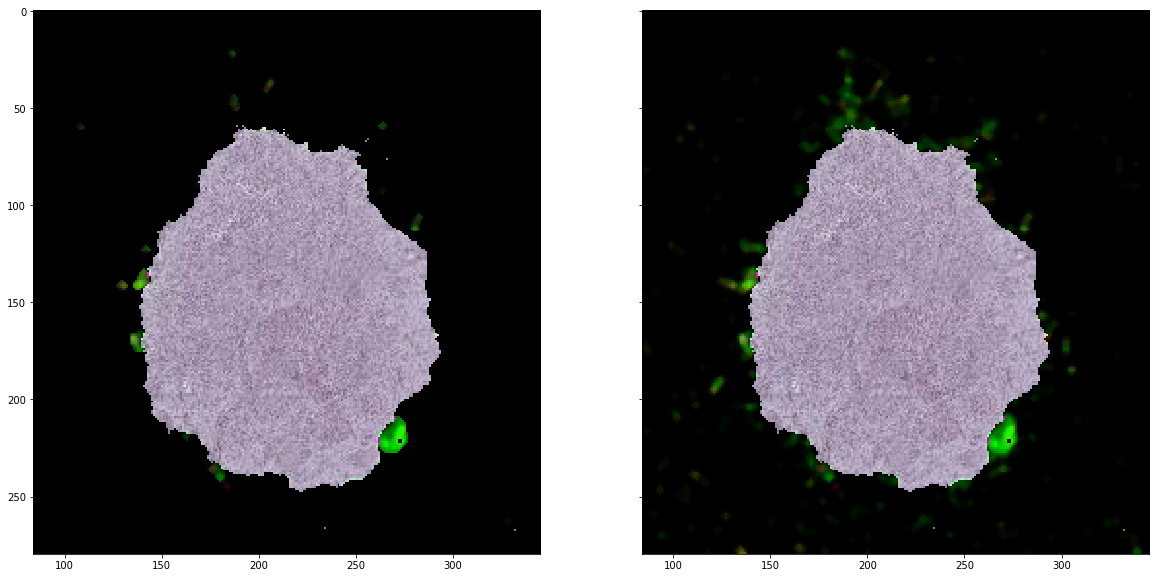

In [139]:
img = B7_2+B7
img1 = img.copy()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,20,290,270)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]


f,pt = plt.subplots(1, 2,figsize=(20,10), sharey=True)
pt[0].imshow(img)
pt[1].imshow(img1)
B7_3 = img

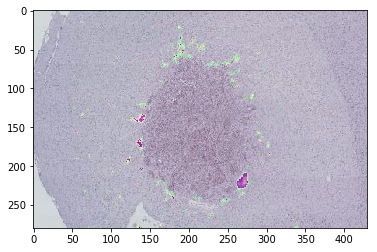

In [140]:
plt.imshow(B7_2+B7_o)

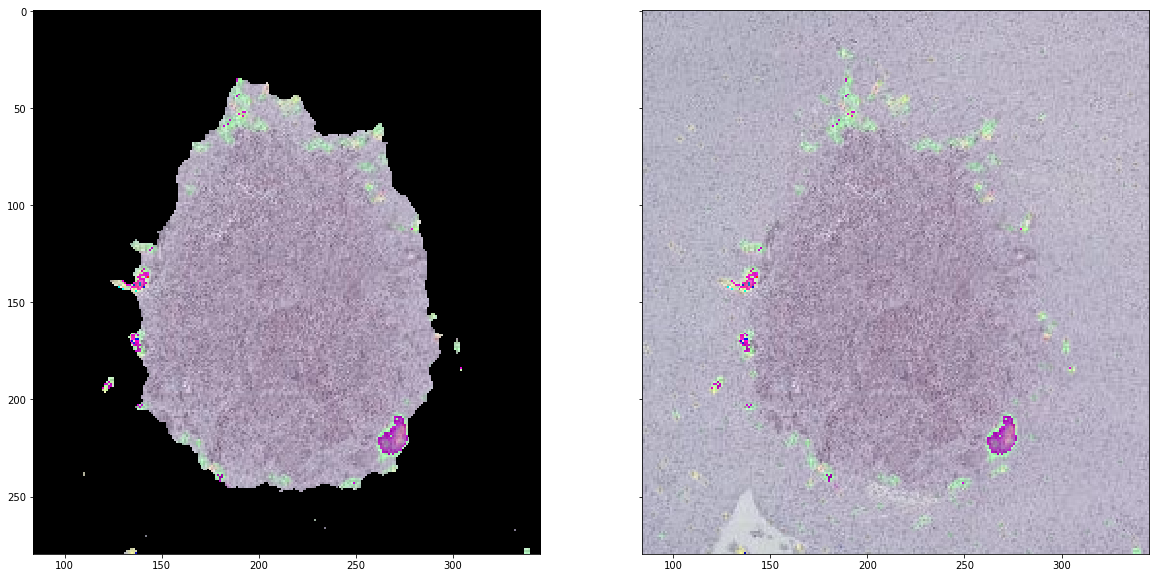

In [141]:
img = B7_2+B7_o
img1 = img.copy()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,20,290,270)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]


f,pt = plt.subplots(1, 2,figsize=(20,10), sharey=True)
pt[0].imshow(img)
pt[1].imshow(img1)
B7_4 = img

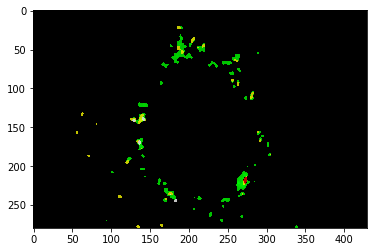

In [77]:
img = cv2.GaussianBlur(B7_2,(3,3),0)
#img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3) + 187
r,img = cv2.threshold(img,187,255,cv2.THRESH_TOZERO)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
plt.imshow(img)
B7_5 = img

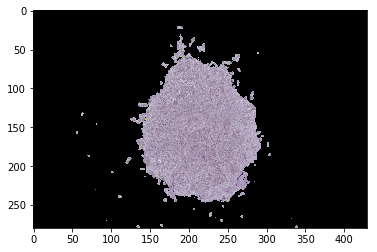

In [78]:
img = B7_5.copy()
imgg = img[:,:,0]+img[:,:,1]+img[:,:,2]

for i in range(imgg.shape[0]):
    for j in range(imgg.shape[1]):
        if (imgg[i,j]>0):
            for x in range(3):
                img[i,j,x] = B7_o[i,j,x]

plt.imshow(img+B7)
B7_6 = img+B7

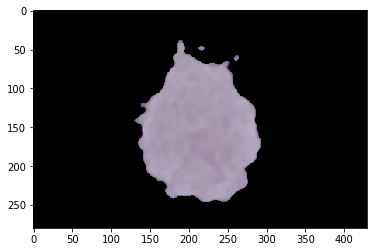

In [79]:
img = B7_6.copy()
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,5)
img = cv2.medianBlur(img,7)
r,img = cv2.threshold(img,90,255,cv2.THRESH_TOZERO)

plt.imshow(img)
B7_7 = img

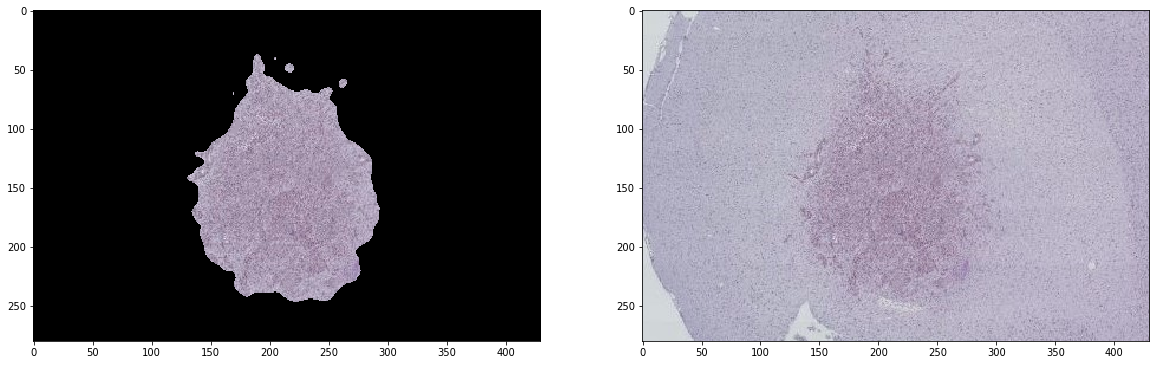

In [80]:
img = B7_7.copy()
imgg = img[:,:,0]+img[:,:,1]+img[:,:,2]

for i in range(imgg.shape[0]):
    for j in range(imgg.shape[1]):
        if (imgg[i,j]>0):
            for x in range(3):
                img[i,j,x] = B7_o[i,j,x]
f,pt = plt.subplots(1,2,figsize=(20,10))
pt[0].imshow(img)
pt[1].imshow(B7_o)
B7_8 = img

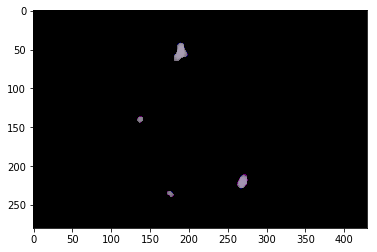

In [81]:
img = B7_8.copy()
img = B7_8-B7
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,3)
img = cv2.medianBlur(img,5)
img = cv2.medianBlur(img,7)
r,img = cv2.threshold(img,100,255,cv2.THRESH_TOZERO)
img = cv2.medianBlur(img,9)

plt.imshow(img)

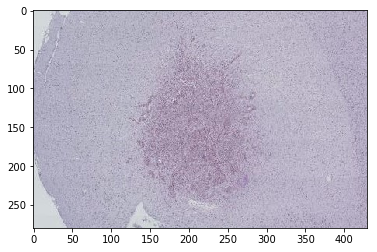

In [82]:
plt.imshow(B7_o)

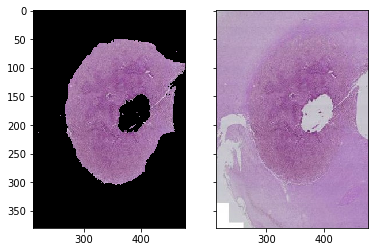

In [83]:
def crop(img):
    return img[270:650,110:800]

img = cv2.imread('AAT140 C14.jpg')
img1 = crop(img)
img = crop(img)

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (220,50,260,300)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

f,pt = plt.subplots(1, 2, sharey=True)
pt[0].imshow(img)
pt[1].imshow(img1)
C14 = img

In [84]:
img = B7.copy()
# ret, img = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im2, contours, hierarchy = cv2.findContours(imggray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

area = []
for cnt in contours:
    area.append(cv2.contourArea(cnt))

for cnt in contours:
        if (cv2.contourArea(cnt)==max(area)):
            cv2.drawContours(img, cnt,-1, (0,0,255), 2)

B7_area = max(area)
# plt.imshow(img)
print (B7_area)

20474.5


In [85]:
img = C14.copy()
# ret, img = cv2.threshold(img,1,255,cv2.THRESH_BINARY)
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im2, contours, hierarchy = cv2.findContours(imggray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

area = []
for cnt in contours:
    area.append(cv2.contourArea(cnt))

for cnt in contours:
        if (cv2.contourArea(cnt)==max(area)):
            cv2.drawContours(img, cnt,-1, (0,255,0), 2)
#         cv2.drawContours(img, cnt,-1, (0,255,0), 2)
C14_area = max(area)
plt.figure(figsize=(10,10))
# plt.imshow(img)
print (C14_area)

37370.5


(0, 1300)

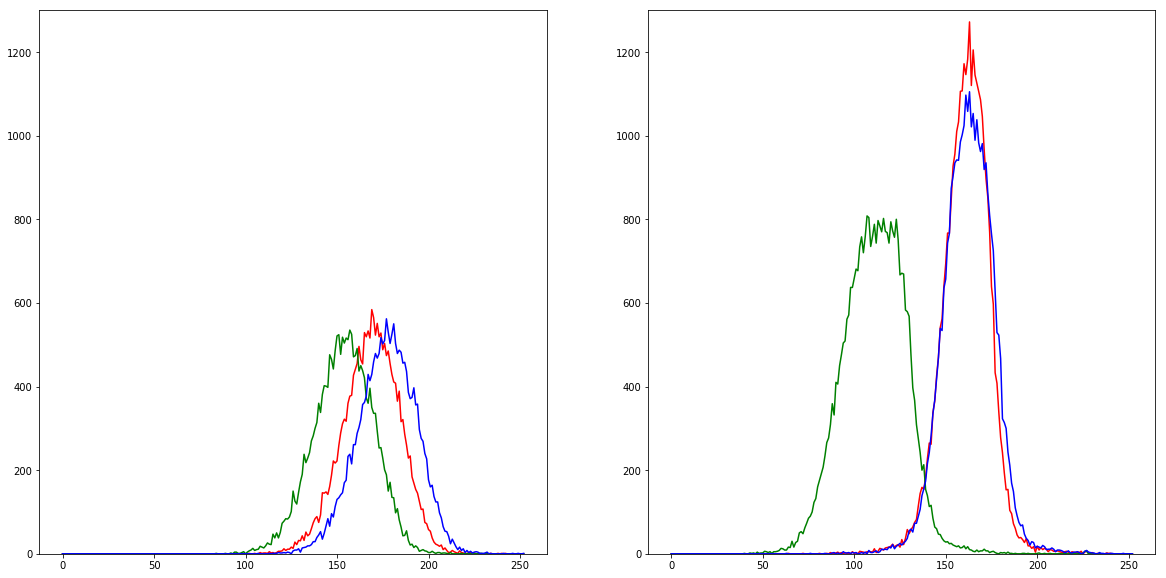

In [86]:
img = B7
f,pt = plt.subplots(1, 2, figsize=(20,10), sharey=False)
color = ('r','g','b')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    histr = histr[1:254]
    pt[0].plot(histr,color=col)
pt[0].set_title = 'B7'
pt[0].set_ylim([0,1300])

img = C14
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    histr = histr[1:254]
    pt[1].plot(histr,color=col)
pt[1].set_title = 'C14'
pt[1].set_ylim([0,1300])

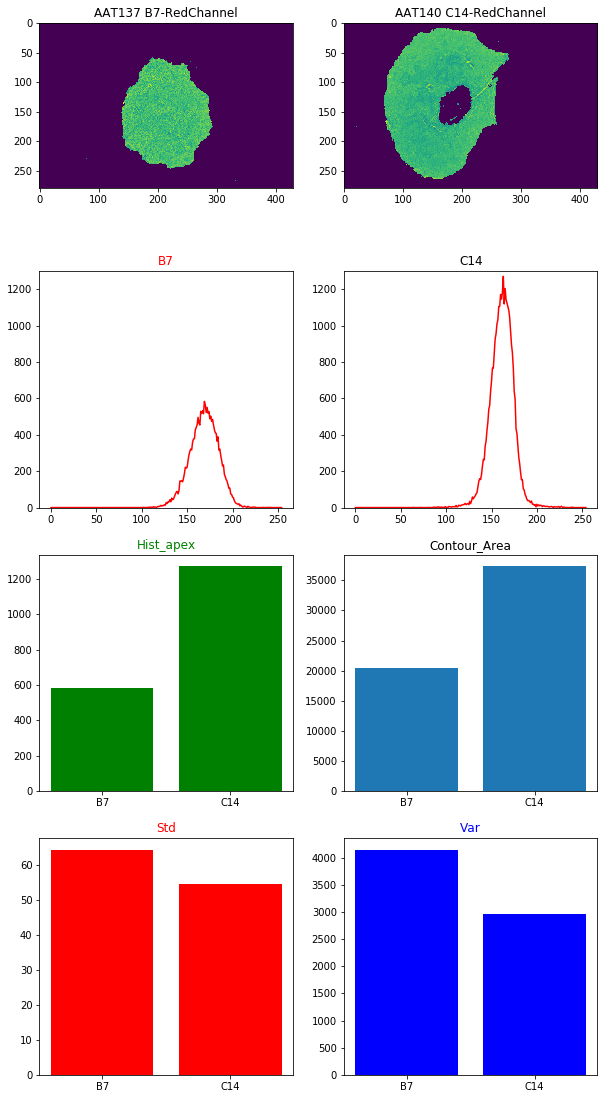

In [87]:
images = ['B7','C14']
img_areas = [B7_area,C14_area]
x = C14[:,:,2]
C14_ = x[x<185]
img_std = [np.std(B7[:,:,0]), np.std(C14_)]
img_var = [np.var(B7[:,:,0]), np.var(C14_)]



images = ['B7','C14']
hist_max = [histPlot(B7).max(),histPlot(C14).max()]


f,pt = plt.subplots(4,2,figsize=(10,20), sharey=False)
pt[0,0].imshow(B7[:,:,0])
pt[0,0].set_title('AAT137 B7-RedChannel')
pt[0,1].imshow(C14[40:320,200:630][:,:,0])
pt[0,1].set_title('AAT140 C14-RedChannel')
pt[1,0].set_title('B7',color='r')
pt[1,0].plot(histPlot(B7),color='r')
pt[1,0].set_ylim([0,1300])
pt[1,1].set_title('C14')
pt[1,1].plot(histPlot(C14),color='r')
pt[1,1].set_ylim([0,1300])
pt[2,0].set_title('Hist_apex',color='g')
pt[2,0].bar(images,hist_max,color='g')
pt[2,1].set_title('Contour_Area')
pt[2,1].bar(images,img_areas)
pt[3,0].bar(images,img_std,color='r')
pt[3,0].set_title('Std',color='r')
pt[3,1].bar(images,img_var,color='b')
pt[3,1].set_title('Var',color='b')
plt.show()